In [155]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [156]:
#define the transmission curve

def Tsymthru(wavelength, neff, abscoef_power, r, radius):
    phase=4*math.pi**2*radius*neff/wavelength
    round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom
def dB2Frac(dB):
    return 10**(dB/10)

In [157]:
#extract the data

Vn1_T= np.loadtxt("../RT-Transmission-Data/-1V-RT-Data.csv", delimiter=",")
x = Vn1_T[:,0] 
y = Vn1_T[:,1]

In [158]:
#check for an weird points

print(y)

[0.99186471 0.98734581 0.97260974 0.9671759  0.95615925 0.94750263
 0.9376093  0.92596194 0.91315016 0.89636525 0.88012229 0.85405197
 0.82871681 0.79720423 0.76071682 0.72146724 0.6830892  0.64550904
 0.60539866 0.55863044 0.49781835 0.44232337 0.38457987 0.33212263
 0.2860566  0.23395067 0.17977467 0.12310615 0.07242108 0.04476068
 0.04033739 0.06176042 0.10421662 0.1669144  0.2334267  0.29800839
 0.3590583  0.41766104 0.47092577 0.51894687 0.56987933 0.62299012
 0.66720471 0.71459468 0.75110994 0.77939812 0.79967743 0.82311228
 0.83881983 0.85098007 0.86181005 0.86987398 0.87528269 0.88005795
 0.87951965]


In [159]:
#remove any weird outliers from the data extraction

x = x[:-1]
y = y[:-1]

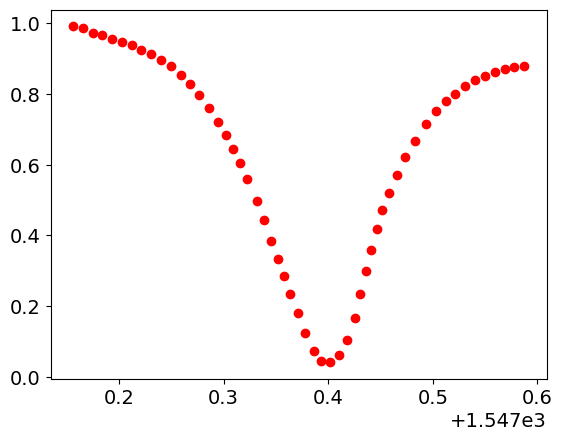

In [160]:
plt.plot(x, y, 'ro', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [161]:
#define the radius and r values

def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power, 0.99125, 10e-6)

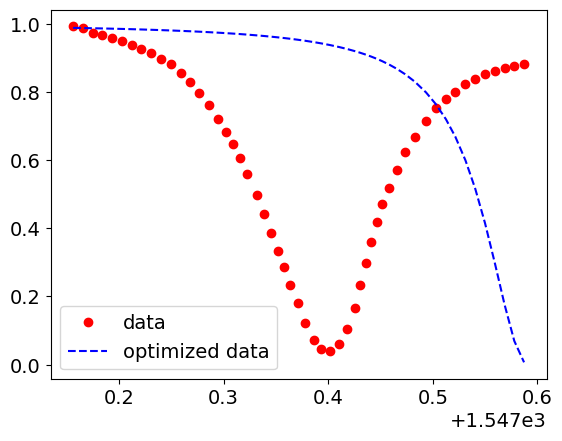

In [162]:
#plot a guess to make sure the neff value works
new_x = np.linspace(1540, 1550, 100)
ans = Guess(x*1e-9,2.1675, 280)

plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [163]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[2.1675, 280]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x*1e-9,y,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[  2.1672266  444.07440521]
 [  2.1672266  444.04598498]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266  444.04999354]
 [  2.1672266 

In [164]:
fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])

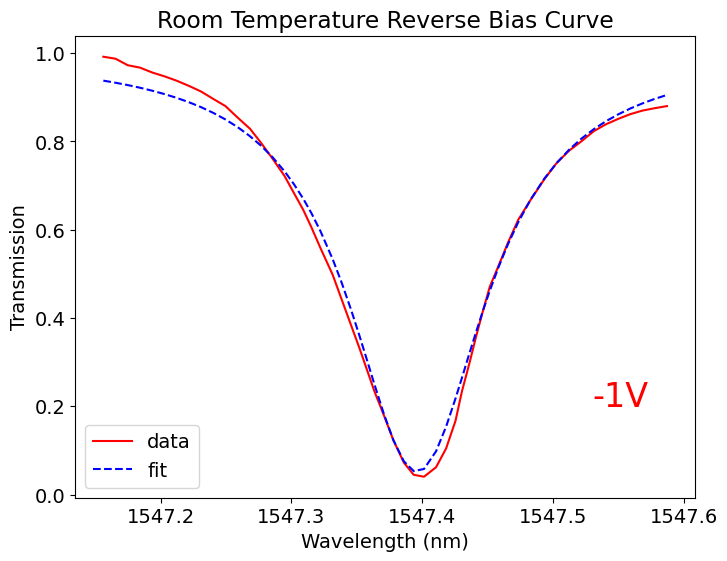

In [165]:
#later I could take the time to calculate the distance between the x values of points to show how the curve bends to the right, but not now

plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.plot(x, y, '-', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
plt.title('Room Temperature Reverse Bias Curve')
plt.ticklabel_format(useOffset=False)
plt.text(1547.53, 0.2, r'-1V', color = "red", fontsize="24")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')

plt.legend(loc='lower left')
plt.savefig("RT-1V.png")
plt.show()

In [166]:
exp_data = np.zeros((len(x), 2))
exp_data[:, 0] = x
exp_data[:, 1] = y

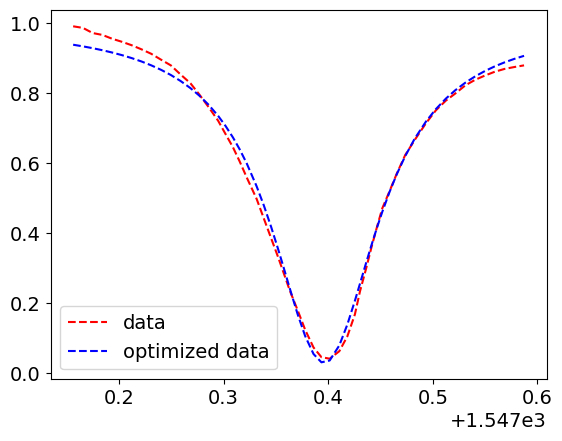

In [167]:
#now we manually adjust

ans = Tsymthru(x*1e-9,2.16722655,293.46159565, 0.98713898, 10e-6)

plt.plot(x, y, '--', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [168]:
num_data2 = np.zeros((len(x), 2))
num_data2[:, 0] = x
num_data2[:, 1] = ans

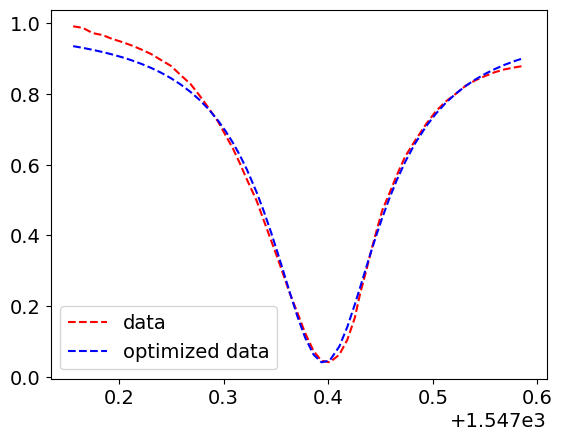

In [169]:
#now we manually adjust

ans = Tsymthru(x*1e-9,2.16722655,293.46159565, 0.98635, 10e-6)

plt.plot(x, y, '--', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [170]:
num_data3 = np.zeros((len(x), 2))
num_data3[:, 0] = x
num_data3[:, 1] = ans

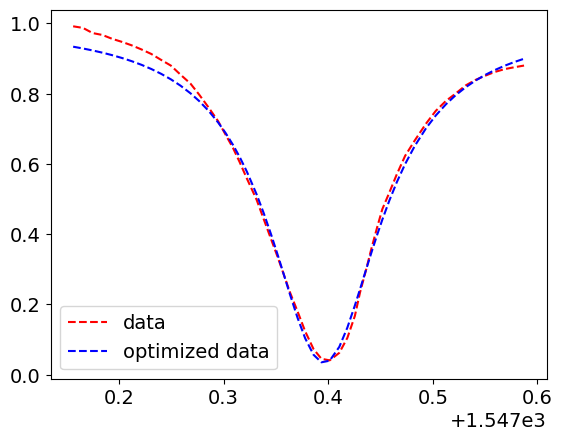

In [171]:
#now we manually adjust

ans = Tsymthru(x*1e-9,2.16722655,302.66952052, 0.98635, 10e-6)

plt.plot(x, y, '--', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [172]:
num_data4 = np.zeros((len(x), 2))
num_data4[:, 0] = x
num_data4[:, 1] = ans

In [173]:
#lets try fitting the r and coeff values

def Guess2(wavelength, abscoef_power, r):
    return Tsymthru(wavelength, 2.16722655, abscoef_power, r, 10e-6)

In [174]:
def Tsymthru2(wavelength, abscoef_power, r, radius, neff):
    phase=4*math.pi**2*radius*neff/wavelength
    round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom

In [175]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[293, 0.98635]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess2,x*1e-9,y,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052   0.98713898]
 [302.66952052

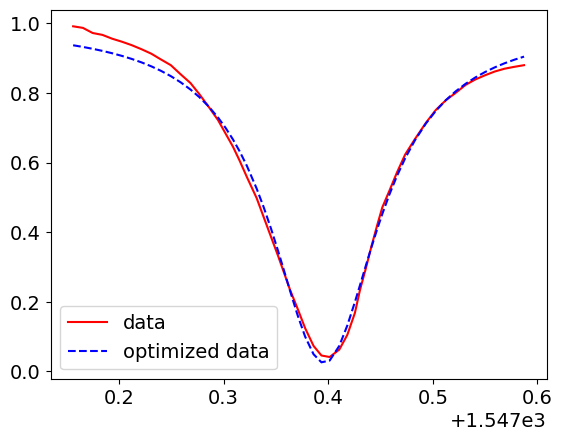

In [176]:
fit_ans = Guess2(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
plt.plot(x, y, '-', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()